In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import numpy as np
import yaml
import pandas as pd
from sm_annotation_utils import sm_annotation_utils
import matplotlib.pyplot as plt

/Users/palmer/miniconda2/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


ImportError: No module named sm_annotation_utils

### SM dist results

In [19]:
# Results obtained from the sm-engine
config = 'config.yml'
dataset_name = "MBa2s1"
remote_instance = sm_annotation_utils.SMInstance(config)
remote_results = remote_instance.dataset(dataset_name)
remote_df = remote_results.results()

### Ref pipeline results

In [20]:
# Results obtained from pySM reference implementation
ref_file = '/home/palmer/Documents/tmp_data/MBnoInstrument/MB2/Bregma1-42_01/HMDB/2.5/Brain02_Bregma1-42_01_spatial_all_adducts_full_results.txt'
reference_results = pd.read_csv(ref_file).dropna()
reference_results = reference_results[reference_results.adduct.isin(['+H', '+Na', '+K'])].set_index(['sf', 'adduct'])
#reference_results['msm'] = reference_results[['moc','spat','spec']].prod(axis=1)

### Plotting

<IPython.core.display.Javascript object>


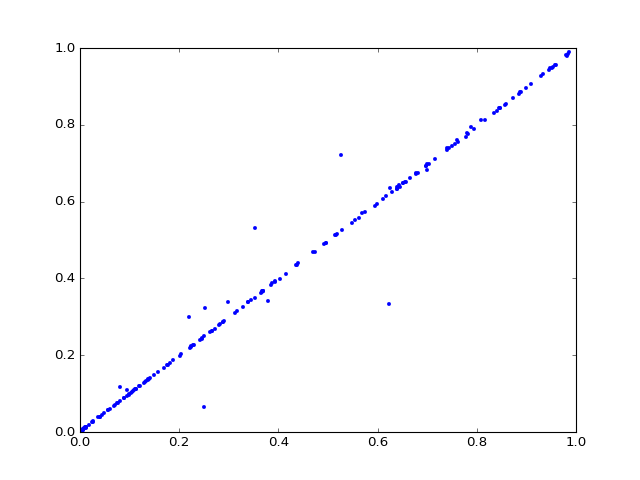

In [21]:
n_plot = 500
remote_df = remote_df.sort_values(by='msm', ascending=False).head(n_plot)
reference_df = reference_results.sort_values(by='msm', ascending=False).head(n_plot)

_ = sm_annotation_utils.plot_diff(remote_df,
                              reference_df,
                              t='RB ref vs engine', xlabel='reference', ylabel='local')